In [1]:
import numpy as np
from astropy import constants as cc, units as uu

In [2]:
# fine constant
alpha=(1/4/np.pi/cc.eps0*cc.e.si**2/cc.hbar/cc.c).si

In [3]:
m_H = (cc.m_p+cc.m_e)/2
N = (uu.kg/m_H).si
lambda_1_value= cc.h/(m_H*cc.c)
P=(cc.eps0*cc.c**2*lambda_1_value/(2*np.pi**2)/N/cc.e.si**2*uu.kg).si * (2*np.pi)
B= 1/(4*np.pi**2*alpha)
lambda_1_value, N, P * (2*np.pi*alpha)

(<Quantity 2.64138117e-15 s2 J / (kg m)>,
 <Quantity 1.19507662e+27>,
 <Quantity 1.>)

In [4]:
1/2 * np.pi * alpha 

<Quantity 0.01146265>

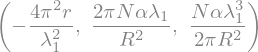

In [5]:
from sympy import symbols, cos, diff, pi, simplify, sin, init_printing, solve
init_printing()

# Define variables and constants
r, R, lambda_1, lambda_2, alpha, N, P, e, epsilon_0, h,c  = symbols('r R lambda_1 lambda_2 alpha N P e epsilon_0 h c')
k1 = 2 * pi / lambda_1
k2 = 2 * pi * N / lambda_1
lambda_2 = lambda_1/N
P = 1 / (2 * pi * alpha)

# Define the envelope for Phi_2 with simplification for highly oscillatory function
Phi_2 = 1 / (1 + P * (R - r)/lambda_1)
# Derivative of Phi_2 after simplification (R>>r, alpha*k2*R >>1)
dPhi_2_dr_simplified =  (lambda_1**2/lambda_2) / (P* R**2)
alpha = e**2/(2*epsilon_0*h*c)
# Define Phi_1 with consideration of small angle (sin(k1*r) ≈ k1*r)
Phi_1 = cos(k1 * r) / (1 + P/lambda_1 * r )
# Simplified derivative of Phi_1 considering dcos(k1 * r)/dr = -k1*sin(k1*r) ≈ -k1^2*r and 1+alpha*k1*r ≈ 1 for very small r
# one also considers that the envelope varies slowly within the small distances defined by r
dPhi_1_dr_simplified = -k1**2 * r 

# Sum the simplified derivatives to get the total derivative
dPhi_total_dr_simplified = dPhi_1_dr_simplified + dPhi_2_dr_simplified

# Solve the simplified total derivative for r
solution_r = solve(dPhi_total_dr_simplified, r)
x= solution_r[0]
# x = x.subs(P, 1/(2*pi*alpha)) #.subs(alpha,e**2/(2*epsilon_0*h*c)) 
# x = x.subs( P, 1/(2*pi*alpha))
dPhi_1_dr_simplified , dPhi_2_dr_simplified, x

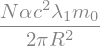

In [6]:
# Define the symbols
m_0, c, lambda_1, N, R, alpha, kg, epsilon_0, e, v, h, kg = symbols('m_0 c lambda_1 N R alpha kg epsilon_0 e v h kg')
init_printing()



# tanh(theta) = v/c acceleration felt by a single dilator actuated by N dilators is given by:
#acceleration = c dtanh(tetha)/dr= c (1-tanh(theta)**2) * dtheta/dr 
#acceleration = c (1-tanh(theta)**2) * x/lambda1**2
# Force is given by c (1-v**2/c**2) * lambda_1**3/(8*pi**3*N*R**2*alpha)/lambda1**2
# The force is given by kg*acceleration. where m0 = Fundamental Dilator 4D mass = 1 kg/N
# That is the force between 1 kg of dilators and one dilator
# Given the force equation for electromagnetic interaction
F = (m_0 * c**2 * x/lambda_1**2)
F

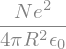

In [7]:

# Substitute m_0 with 1/N, where N is the number of dilators in 1 kg
F_substituted = F.subs(kg, N*h/c/lambda_1)
# Simplify the expression
F_simplified = simplify(F_substituted)
alpha_expr = e**2 / (2 * epsilon_0 * h * c)
F_simplified = F_simplified.subs(alpha, alpha_expr)
F_simplified = F_simplified.subs(m_0, h/c/lambda_1)
# This will print the simplified force equation
F_simplified


# Beginning of Universe Thickness Calculation

In [8]:
t1 = lambda_1_value/cc.c
alpha_value = cc.e.si**2 / (2 * cc.eps0 * cc.h * cc.c)
A =1/(2*np.pi*alpha_value)
B = 2*np.pi**2
TotalRadius = (A/ (2*np.pi**2))**(1/3)
UniverseThickness = (TotalRadius-1)/4
print("Compton Values", lambda_1_value, t1, "\n")
print("Universe Thickness",  UniverseThickness.si)
print("State Life", (t1*UniverseThickness).si)
print("Compton Period", t1.si)
print("4D electron radius", TotalRadius)

Compton Values 2.6413811696334575e-15 s2 J / (kg m) 8.810699199222208e-24 s3 J / (kg m2) 

Universe Thickness 0.00845307026128811
State Life 7.447745938210021e-26 s
Compton Period 8.810699199222208e-24 s
4D electron radius 1.0338122810451524


# END

In [9]:
def mom_inertia0(r, h):
    return 1/12*(3*r**2+h)

def mom_inertia1(r):
    return 1/2*r**2
    
r_p = 8.414e-16
r_e = r_p*cc.m_e/cc.m_p
g_e = mom_inertia1(r_e)/mom_inertia0(r_e, UniverseThickness)
g_p = mom_inertia1(r_p)/mom_inertia0(r_p, UniverseThickness)
print("Radii")
print( r_e, r_p)
print("Moments of Inertia")
print( mom_inertia0(r_e, UniverseThickness),mom_inertia0(r_p, UniverseThickness),mom_inertia1(r_e),mom_inertia1(r_p))

Radii
4.58240761877198e-19 8.414e-16
Moments of Inertia
0.0007044225217740091 0.0007044225217740091 1.0499229792289743e-37 3.5397698000000003e-31


In [10]:
(2*np.pi*alpha_value), 1/(2*np.pi**2)

(<Quantity 0.04585062 C2 / (F J)>, 0.05066059182116889)

# The Energy of the Fundamental Dilator is being modeled by circles.
# At each expansion step with length $\lambda_1$, the energy (valued at 1 or unit) is distributed
# over a hyperspherical hypersurface of radius $\lambda_1$, which is normalized to One
$$ 2 \pi \alpha = \frac{1}{2 \pi^2 r^3} $$
or
$$ r = ( \frac{1}{4 \pi^3 \alpha } ) ^{1/3} $$


In [65]:
T_lambda = (lambda_1_value/cc.c).si
StateLifetime_4D_radius = 1/(4*np.pi**3*alpha_value)**(1/3)
StateLifetime_4D_radius_seconds = (StateLifetime_4D_radius*T_lambda).si
StateLifetime_seconds = ((StateLifetime_4D_radius-1)*lambda_1_value/cc.c).si
# A hydrogen atom has twice the 4D mass of a Fundamental Dilator
DeltaE = 0.5*m_H*cc.c**2
DeltaT_HeisenbergPrinciple = (cc.h/(4*np.pi)/DeltaE).si
# Comparison between the Compton Period of 0.5 Hydrogen atom  # T_lambda
# with the observed period extracted from 1/(2*pi*alpha)=2*pi**2*r**3  # StateLifetime_4D_radius_seconds
# and compared with 4 appearances of the 4D mass per period # 4* DeltaT_HeisenbergPrinciple
T_lambda, StateLifetime_4D_radius_seconds, (4* DeltaT_HeisenbergPrinciple)

(<Quantity 8.8106992e-24 s>, <Quantity 1.62390853>)